<a href="https://colab.research.google.com/github/vladimirsnap/options/blob/main/Volatility_calc_IEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/OPT-SPY.csv')
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3397 non-null   object 
 1   stockpx    3397 non-null   float64
 2   iv30       3397 non-null   float64
 3   iv60       3397 non-null   float64
 4   iv90       3397 non-null   float64
 5   m1atmiv    3397 non-null   float64
 6   m1dtex     3397 non-null   float64
 7   m2atmiv    3397 non-null   float64
 8   m2dtex     3397 non-null   float64
 9   m3atmiv    3397 non-null   float64
 10  m3dtex     3397 non-null   float64
 11  m4atmiv    3397 non-null   float64
 12  m4dtex     3397 non-null   float64
 13  slope      3397 non-null   float64
 14  deriv      3397 non-null   float64
 15  slope_inf  3397 non-null   float64
 16  deriv_inf  3397 non-null   float64
 17  10dclsHV   3397 non-null   float64
 18  20dclsHV   3397 non-null   float64
 19  60dclsHV   3397 non-nu

             iv30      iv60      iv90   m1atmiv   m2atmiv   m3atmiv   m4atmiv
iv30     1.000000  0.988600  0.976427  0.391892  0.989678  0.980465  0.966355
iv60     0.988600  1.000000  0.992888  0.385547  0.993105  0.995361  0.985553
iv90     0.976427  0.992888  1.000000  0.371909  0.980952  0.995659  0.995893
m1atmiv  0.391892  0.385547  0.371909  1.000000  0.395011  0.378367  0.365808
m2atmiv  0.989678  0.993105  0.980952  0.395011  1.000000  0.986348  0.973141
m3atmiv  0.980465  0.995361  0.995659  0.378367  0.986348  1.000000  0.990187
m4atmiv  0.966355  0.985553  0.995893  0.365808  0.973141  0.990187  1.000000


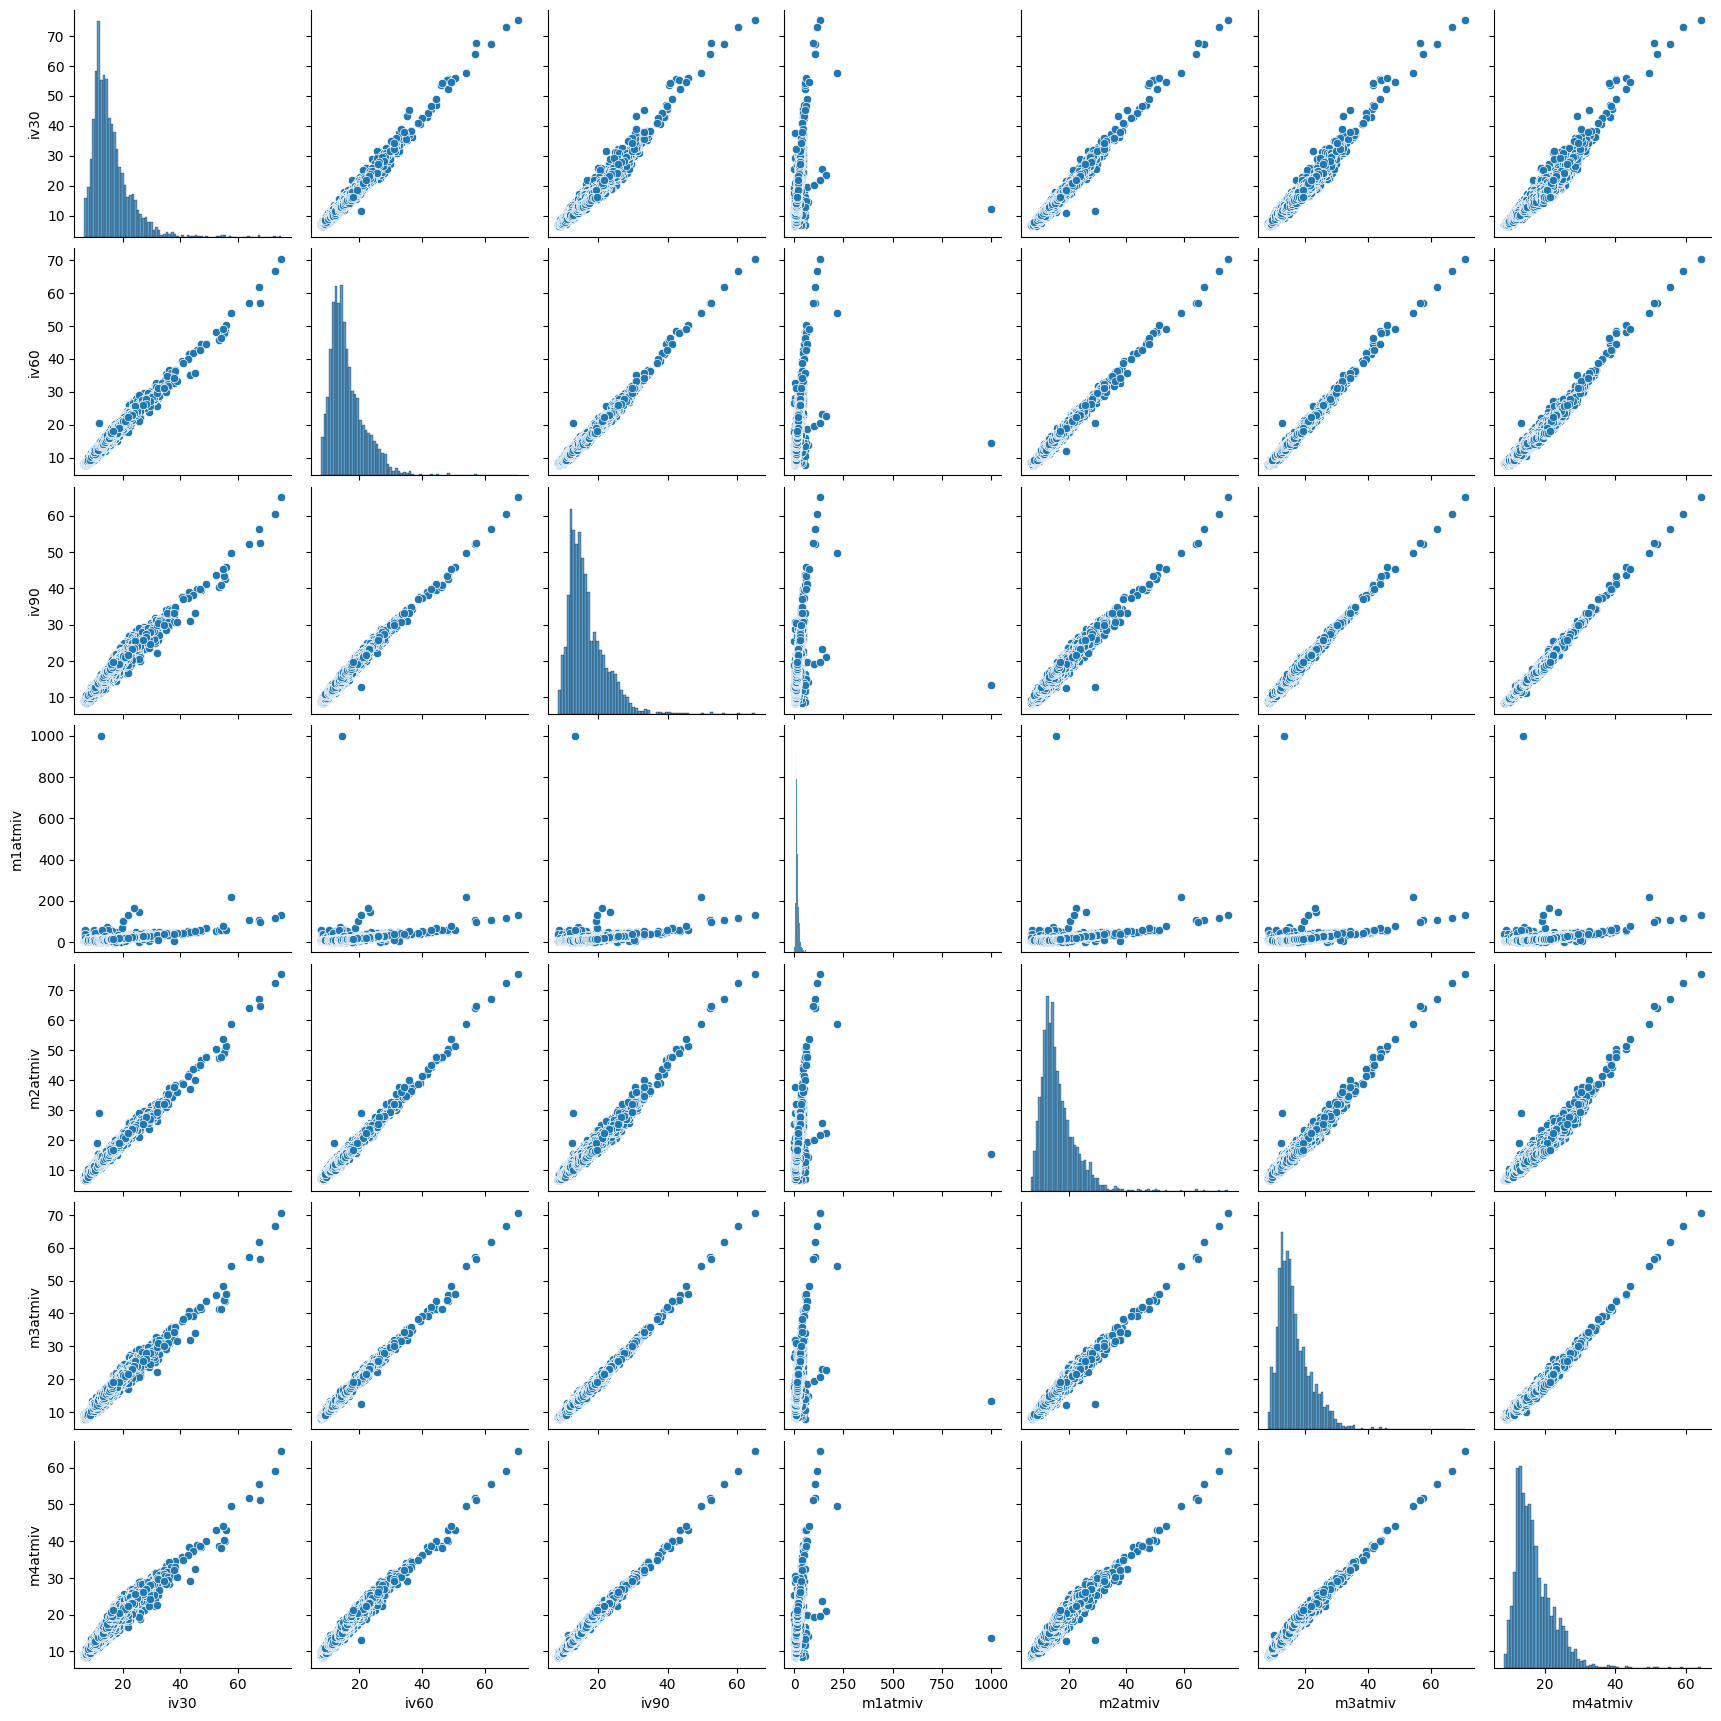

In [14]:
correlation_matrix = df[['iv30', 'iv60', 'iv90', 'm1atmiv', 'm2atmiv', 'm3atmiv', 'm4atmiv']].corr()
print(correlation_matrix)

import seaborn as sns
sns.pairplot(df[['iv30', 'iv60', 'iv90', 'm1atmiv', 'm2atmiv', 'm3atmiv', 'm4atmiv']])


In [4]:
df.describe()

,stockpx,iv30,iv60,iv90,m1atmiv,m1dtex,m2atmiv,m2dtex,m3atmiv,m3dtex,...,10dclsHV,20dclsHV,60dclsHV,120dclsHV,252dclsHV,10dORHV,20dORHV,60dORHV,120dORHV,252dORHV
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,...,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,246.194095,15.645202,16.277468,16.702953,17.041180,16.533412,16.144975,47.130998,16.549208,77.826023,...,13.804012,14.528413,15.398304,15.919500,16.539806,14.739500,15.011790,15.556647,15.993456,16.530683
std,101.848031,6.538722,5.826157,5.403632,19.747461,9.707523,6.175012,10.449169,5.620937,10.744876,...,9.591804,9.169519,8.209176,7.301958,6.170599,9.001565,8.541115,7.545303,6.624742,5.533474
min,102.200000,6.390000,7.800000,8.350000,1.070000,2.000000,6.690000,30.000000,7.920000,58.000000,...,1.900000,3.110000,4.940000,6.240000,6.720000,3.520000,4.320000,5.420000,6.460000,6.960000
25%,161.370000,11.310000,12.340000,12.890000,11.230000,9.000000,12.080000,39.000000,12.720000,69.000000,...,7.760000,8.850000,10.750000,11.570000,12.050000,9.060000,9.630000,10.890000,11.580000,12.350000
50%,216.750000,14.040000,14.830000,15.400000,14.350000,17.000000,14.610000,47.000000,15.200000,76.000000,...,11.460000,12.370000,13.210000,13.730000,15.230000,12.370000,12.740000,13.480000,14.060000,15.600000
75%,307.100000,18.300000,18.940000,19.350000,19.480000,24.000000,18.770000,54.000000,19.130000,86.000000,...,17.190000,17.800000,17.950000,18.180000,18.770000,17.810000,18.120000,18.720000,18.760000,19.610000
max,477.710000,75.310000,70.440000,65.070000,1000.000000,62.000000,75.390000,97.000000,70.640000,125.000000,...,106.520000,91.260000,61.530000,45.930000,33.910000,94.310000,79.140000,54.640000,41.180000,31.160000


In [5]:
import numpy as np
from scipy.signal import argrelextrema

# Указываем период для скользящей средней
period = 30

# Рассчитываем скользящую среднюю IV
df['IV_MA'] = df['iv30'].rolling(window=period).mean()

# Находим локальные максимумы и минимумы
df['local_max'] = df.iloc[argrelextrema(df['iv30'].values, np.greater)[0]]['iv30']
df['local_min'] = df.iloc[argrelextrema(df['iv30'].values, np.less)[0]]['iv30']

# Инициализируем колонки для дней до возврата к средней
df['days_to_mean_from_max'] = np.nan
df['days_to_mean_from_min'] = np.nan

# Рассчитываем количество дней до возврата к средней для максимумов
max_days = df[df['local_max'].notna()].index
for day in max_days:
    try:
        df.loc[day, 'days_to_mean_from_max'] = df[(df.index > day) & (df['iv30'] <= df.loc[day, 'IV_MA'])].index[0] - day
    except IndexError:
        pass

# Рассчитываем количество дней до возврата к средней для минимумов
min_days = df[df['local_min'].notna()].index
for day in min_days:
    try:
        df.loc[day, 'days_to_mean_from_min'] = df[(df.index > day) & (df['iv30'] >= df.loc[day, 'IV_MA'])].index[0] - day
    except IndexError:
        pass


In [6]:
# Посмотреть общую статистику по дням до возврата к средней для максимумов
print(df['days_to_mean_from_max'].describe())

# Посмотреть общую статистику по дням до возврата к средней для минимумов
print(df['days_to_mean_from_min'].describe())

# Посмотреть среднее количество дней до возврата к средней для максимумов
print(df['days_to_mean_from_max'].mean())

# Посмотреть среднее количество дней до возврата к средней для минимумов
print(df['days_to_mean_from_min'].mean())



count    879.000000
mean      16.501706
std       46.771676
min        1.000000
25%        1.000000
50%        1.000000
75%        7.000000
max      344.000000
Name: days_to_mean_from_max, dtype: float64
count     875.000000
mean       20.116571
std       128.859289
min         1.000000
25%         1.000000
50%         1.000000
75%         8.000000
max      2145.000000
Name: days_to_mean_from_min, dtype: float64
16.501706484641637
20.11657142857143


In [7]:
df['change_from_max_to_mean'] = df['local_max'] - df['IV_MA']
df['change_from_min_to_mean'] = df['IV_MA'] - df['local_min']


In [8]:
print(df['change_from_max_to_mean'].describe())
print(df['change_from_min_to_mean'].describe())


count    883.000000
mean       1.092163
std        4.074655
min      -28.741667
25%       -0.674833
50%        0.805000
75%        2.637167
max       32.452000
Name: change_from_max_to_mean, dtype: float64
count    886.000000
mean       0.924097
std        3.601440
min      -23.108000
25%       -0.539583
50%        0.677333
75%        2.156667
max       31.845667
Name: change_from_min_to_mean, dtype: float64


In [9]:
df.describe()

,stockpx,iv30,iv60,iv90,m1atmiv,m1dtex,m2atmiv,m2dtex,m3atmiv,m3dtex,...,60dORHV,120dORHV,252dORHV,IV_MA,local_max,local_min,days_to_mean_from_max,days_to_mean_from_min,change_from_max_to_mean,change_from_min_to_mean
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000,...,3397.000000,3397.000000,3397.000000,3368.000000,890.000000,893.000000,879.000000,875.000000,883.000000,886.000000
mean,246.194095,15.645202,16.277468,16.702953,17.041180,16.533412,16.144975,47.130998,16.549208,77.826023,...,15.556647,15.993456,16.530683,15.656495,16.808843,14.741221,16.501706,20.116571,1.092163,0.924097
std,101.848031,6.538722,5.826157,5.403632,19.747461,9.707523,6.175012,10.449169,5.620937,10.744876,...,7.545303,6.624742,5.533474,5.867647,7.410390,6.160630,46.771676,128.859289,4.074655,3.601440
min,102.200000,6.390000,7.800000,8.350000,1.070000,2.000000,6.690000,30.000000,7.920000,58.000000,...,5.420000,6.460000,6.960000,6.961000,6.720000,6.390000,1.000000,1.000000,-28.741667,-23.108000
25%,161.370000,11.310000,12.340000,12.890000,11.230000,9.000000,12.080000,39.000000,12.720000,69.000000,...,10.890000,11.580000,12.350000,11.868750,11.902500,10.710000,1.000000,1.000000,-0.674833,-0.539583
50%,216.750000,14.040000,14.830000,15.400000,14.350000,17.000000,14.610000,47.000000,15.200000,76.000000,...,13.480000,14.060000,15.600000,14.190667,14.955000,13.260000,1.000000,1.000000,0.805000,0.677333
75%,307.100000,18.300000,18.940000,19.350000,19.480000,24.000000,18.770000,54.000000,19.130000,86.000000,...,18.720000,18.760000,19.610000,18.391917,19.567500,17.140000,7.000000,8.000000,2.637167,2.156667
max,477.710000,75.310000,70.440000,65.070000,1000.000000,62.000000,75.390000,97.000000,70.640000,125.000000,...,54.640000,41.180000,31.160000,48.998667,75.310000,67.390000,344.000000,2145.000000,32.452000,31.845667


In [10]:
# Рассчитываем скользящее среднее и скользящее стандартное отклонение IV30
df['rolling_mean_iv30'] = df['iv30'].expanding().mean()
df['rolling_std_iv30'] = df['iv30'].expanding().std()

# Создаем новый DataFrame для хранения результатов
df_iv30_2std = pd.DataFrame(columns=['date', 'return_to_mean_date', 'price_change'])

# Перебираем все даты
for date in df['date']:
    # Если на данную дату IV30 отклоняется от среднего на 2 и более стандартных отклонений...
    if abs(df.loc[df['date'] == date, 'iv30'].values[0] - df.loc[df['date'] == date, 'rolling_mean_iv30'].values[0]) >= 2 * df.loc[df['date'] == date, 'rolling_std_iv30'].values[0]:
        # ... то находим первую дату после этого, когда IV30 возвращается к среднему
        return_to_mean_date = df[(df['date'] > date) & (df['iv30'] <= df['rolling_mean_iv30'])]['date'].min()

        # Если такая дата существует, рассчитываем изменение цены акции
        if return_to_mean_date is not None and not df[df['date'] == return_to_mean_date].empty:
            price_at_2std_deviation = df[df['date'] == date]['stockpx'].values[0]
            price_at_return_to_mean = df[df['date'] == return_to_mean_date]['stockpx'].values[0]
            price_change = price_at_return_to_mean - price_at_2std_deviation

            # Добавляем информацию в df_iv30_2std
            new_row = pd.DataFrame({'date': [date], 'return_to_mean_date': [return_to_mean_date],
                                    'price_change': [price_change]})
            df_iv30_2std = pd.concat([df_iv30_2std, new_row], ignore_index=True)

# Выводим первые строки df_iv30_2std
print(df_iv30_2std.head())


         date return_to_mean_date  price_change
0  2023-06-15          2023-06-22         -6.09
1  2023-06-01          2023-06-08          7.31
2  2023-05-31          2023-06-08         11.28
3  2023-05-30          2023-06-08          8.95
4  2023-05-26          2023-06-08          9.11


In [11]:
# Рассчитываем среднее и стандартное отклонение IV30
df['mean_iv30'] = df['iv30'].expanding().mean()
df['std_iv30'] = df['iv30'].expanding().std()

# Создаем новый DataFrame для хранения результатов
df_iv30_2std = pd.DataFrame(columns=['date', 'return_to_mean_date', 'price_change', 'price_change_percent'])

# Перебираем все даты
for date in df['date']:
    # Если на данную дату IV30 отклоняется от среднего на 2 и более стандартных отклонений...
    if abs(df.loc[df['date'] == date, 'iv30'].values[0] - df.loc[df['date'] == date, 'mean_iv30'].values[0]) >= 2 * df.loc[df['date'] == date, 'std_iv30'].values[0]:
        # ... то находим первую дату после этого, когда IV30 возвращается к среднему
        return_to_mean_date = df[(df['date'] > date) & (df['iv30'] <= df['mean_iv30'])]['date'].min()

        # Если такая дата существует, рассчитываем изменение цены акции
        if return_to_mean_date is not None and not df[df['date'] == return_to_mean_date].empty:
            price_at_2std_deviation = df[df['date'] == date]['stockpx'].values[0]
            price_at_return_to_mean = df[df['date'] == return_to_mean_date]['stockpx'].values[0]
            price_change = price_at_return_to_mean - price_at_2std_deviation
            price_change_percent = (price_change / price_at_2std_deviation) * 100

            # Добавляем информацию в df_iv30_2std
            new_row = pd.DataFrame({'date': [date], 'return_to_mean_date': [return_to_mean_date],
                                    'price_change': [price_change], 'price_change_percent': [price_change_percent]})
            df_iv30_2std = pd.concat([df_iv30_2std, new_row], ignore_index=True)

# Выводим первые строки df_iv30_2std
print(df_iv30_2std.head())


         date return_to_mean_date  price_change  price_change_percent
0  2023-06-15          2023-06-22         -6.09             -1.375960
1  2023-06-01          2023-06-08          7.31              1.732967
2  2023-05-31          2023-06-08         11.28              2.699533
3  2023-05-30          2023-06-08          8.95              2.130040
4  2023-05-26          2023-06-08          9.11              2.168944


Для начала, мы можем вычислить разницу между подразумеваемой волатильностью первого и второго месяца, создав новую колонку в нашем датафрейме. Затем мы можем анализировать эти данные, чтобы увидеть, как часто и насколько быстро разница в подразумеваемой волатильности сходится.

In [16]:
import pandas as pd

# Предположим, что df - это ваш исходный DataFrame
df['iv_diff'] = df['m1atmiv'] - df['m2atmiv']

# Теперь 'iv_diff' содержит разницу между подразумеваемой волатильностью первого и второго месяца


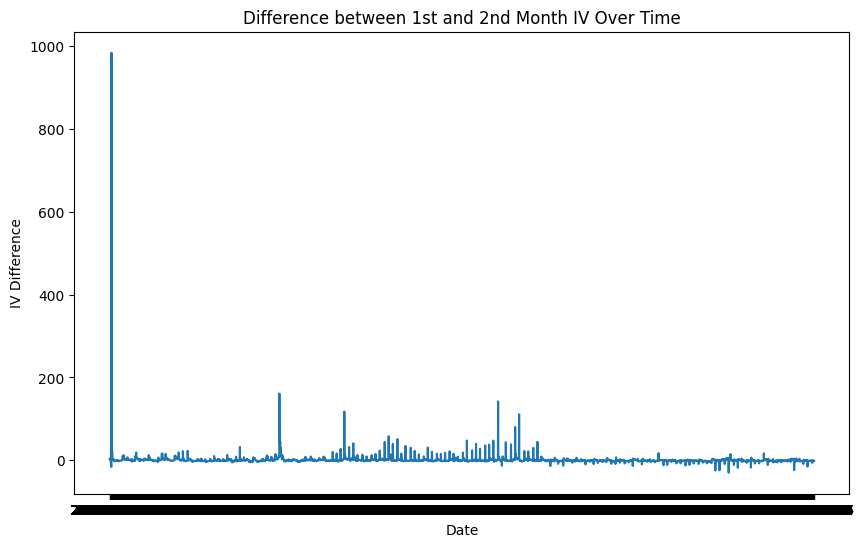

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['date'], df['iv_diff'])
plt.title('Difference between 1st and 2nd Month IV Over Time')
plt.xlabel('Date')
plt.ylabel('IV Difference')
plt.show()


In [23]:
# Посмотрим на первые строки данных
print(df.tail())




            date  stockpx   iv30   iv60   iv90  m1atmiv  m1dtex  m2atmiv  \
3392  2010-01-08   114.57  15.24  17.46  17.91    13.69    10.0    15.96   
3393  2010-01-07   114.19  16.04  17.35  18.40    15.27    11.0    16.45   
3394  2010-01-06   113.71  15.79  17.46  18.79    15.04    12.0    16.24   
3395  2010-01-05   113.63  15.83  17.60  19.04    14.76    13.0    16.56   
3396  2010-01-04   113.33  16.29  17.96  19.61    15.52    14.0    16.89   

      m2dtex  m3atmiv  ...  days_to_mean_from_max  days_to_mean_from_min  \
3392    45.0    18.46  ...                    NaN                    NaN   
3393    46.0    18.04  ...                    1.0                    NaN   
3394    47.0    18.54  ...                    NaN                    NaN   
3395    48.0    18.68  ...                    NaN                    NaN   
3396    49.0    19.23  ...                    NaN                    NaN   

      change_from_max_to_mean  change_from_min_to_mean  rolling_mean_iv30  \
3392     

In [25]:
# Преобразуем столбец 'date' в datetime
df['date'] = pd.to_datetime(df['date'])

# Добавим столбец для хранения времени схождения
df['convergence_time'] = np.nan

# Идем по строкам DataFrame начиная со второй
for i in range(1, len(df)):
    # Если разница между волатильностями меньше или равна медианной, значит, произошло схождение
    if df.iloc[i]['iv_diff'] <= median_diff:
        # Записываем время схождения в новую колонку
        df.loc[i, 'convergence_time'] = (df.iloc[i]['date'] - df.iloc[i - 1]['date']).days

# Удаляем строки, где время схождения неизвестно
df = df.dropna(subset=['convergence_time'])

# Выводим среднее время схождения
print('Среднее время схождения:', df['convergence_time'].mean())


<ipython-input-25-164932055832>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-25-164932055832>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['convergence_time'] = np.nan
<ipython-input-25-164932055832>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i,

Среднее время схождения: -1.4899645808736717


In [28]:
# Создаем скользящее окно размером 30 дней
rolling_window = df['iv_diff'].rolling(window=30)

# Находим индексы максимальных значений в каждом окне
max_diff_indices = rolling_window.apply(lambda x: x.idxmax(), raw=False)

# Удаляем строки с отсутствующими значениями и преобразуем индексы из float в int для дальнейшего использования
max_diff_indices = max_diff_indices.dropna().astype(int)

# Инициализируем пустой список для хранения времени схождения
convergence_times = []

# Идем по индексам максимальных разниц
for index in max_diff_indices:
    # Если это не первый элемент и разница меньше медианной, то добавляем время схождения в список
    if index > 0 and df.loc[index, 'iv_diff'] <= median_diff:
        convergence_times.append(df.loc[index, 'convergence_time'])

# Считаем среднее время схождения
average_convergence_time = np.mean(convergence_times)

print('Среднее время схождения при максимальной разнице за скользящий 30-дневный период:', average_convergence_time)



Среднее время схождения при максимальной разнице за скользящий 30-дневный период: -1.0


In [33]:
# Находим максимальную разницу в каждом окне
max_diffs = rolling_window.max()

# Выводим максимальную разницу волатильности
print('Максимальная разница волатильности за скользящий 30-дневный период:', max_diffs.max())

# Вычисляем медианное значение разностей за весь период
median_diff = df['iv_diff'].median()

# Находим топ-10 максимальных разностей
top_10_diffs = df['iv_diff'].nlargest(10)

# Выводим результаты
print('Медианное значение разностей за весь период:', median_diff)
print('Топ-10 максимальных разностей:', top_10_diffs)



Максимальная разница волатильности за скользящий 30-дневный период: 142.11
Медианное значение разностей за весь период: -0.8399999999999999
Топ-10 максимальных разностей: 1877    142.11
1978    111.08
1727     47.71
1854     47.57
1914     43.76
1371     39.87
1771     39.69
1815     36.09
1432     34.72
636      32.26
Name: iv_diff, dtype: float64


In [36]:
# Получаем индексы строк с топ-10 максимальными разностями
top_10_diff_indices = top_10_diffs.index

# Создаем DataFrame для хранения результата
top_10_diff_data = pd.DataFrame(index=top_10_diff_indices)

# Добавляем в него данные о волатильности m1atmiv, проценте разности от этой волатильности и времени схождения волатильностей
top_10_diff_data['date'] = df.loc[top_10_diff_indices, 'date']
top_10_diff_data['m1atmiv'] = df.loc[top_10_diff_indices, 'm1atmiv']
top_10_diff_data['m2atmiv'] = df.loc[top_10_diff_indices, 'm2atmiv']
top_10_diff_data['diff_percent'] = df.loc[top_10_diff_indices, 'iv_diff'] / df.loc[top_10_diff_indices, 'm1atmiv'] * 100

# Инициализируем список для хранения времени схождения
convergence_times = []

# Для каждого индекса в top_10_diff_indices
for idx in top_10_diff_indices:
    # Находим следующий момент времени, когда разница в волатильности стала меньше или равна медианной
    next_convergence_time = df.loc[idx:][df.loc[idx:]['iv_diff'] <= median_diff].first_valid_index()
    # Если такой момент найден, добавляем его в список
    if next_convergence_time is not None:
        convergence_times.append((df.loc[next_convergence_time, 'date'] - df.loc[idx, 'date']).days)
    # Если такого момента нет, добавляем np.nan
    else:
        convergence_times.append(np.nan)

# Добавляем время схождения в top_10_diff_data
top_10_diff_data['convergence_time'] = convergence_times

top_10_diff_data


,date,m1atmiv,m2atmiv,diff_percent,convergence_time
1877,2016-01-15,164.43,22.32,86.425835,-58
1978,2015-08-21,132.91,21.83,83.575352,-3
1727,2016-08-19,57.22,9.51,83.379937,-1
1854,2016-02-19,67.21,19.64,70.778158,-7
1914,2015-11-20,58.50,14.74,74.803419,-2
1371,2018-01-19,48.54,8.67,82.138443,-8
1771,2016-06-17,55.74,16.05,71.205597,-14
1815,2016-04-15,48.02,11.93,75.156185,-7
1432,2017-10-20,41.41,6.69,83.844482,-3
636,2020-12-18,50.09,17.83,64.404073,-63
